In [1]:
#---------------------------------------------------------------------------------#
#     Computational Finance
#     NOVA IMS
#     Group Project: Carlos Cardoso | 20211220       Carlota Reis | 20211208   
#                    Guilherme Miranda | 20210420    Mariana Garcia | 20210838 
#---------------------------------------------------------------------------------#

In [25]:
import yfinance as yf
import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
import glob

In [3]:
#Exercise 1

In [4]:
#a)

#Building a class that receives, as inputs, maturity, an array with prices and an array with coupons
class YieldCurve:
    def __init__(self,maturity,price,coupon):
        self.maturity = maturity
        self.price = price
        self.coupon = coupon

In [9]:
#b)

class YieldCurve:
    def __init__(self,maturity,price,coupon):
        self.maturity = maturity
        self.price = price
        self.coupon = coupon
        
#Adding a method to the YieldCurve class that, given the inputs of the class, returns the discount factors 

    def matrix_operation(self):
        years = self.maturity
        
        #creating an array with cashflows for each bond
        cfs = [[coupon if year < maturity else \
        coupon + 100 if year == maturity else 0 \
        for year in range(years)] \
        for maturity, coupon in enumerate(self.coupon)]
        
        #Creating a vector of discount factors using matrices operations
        dfs = np.linalg.inv(cfs) @ self.price
        return dfs


In [10]:
#Providing the initial inputs for the YieldCurve class
coupon = np.linspace(1.50,3.75,10)
price = [96.6, 93.71, 91.56, 90.24, 89.74, 90.04, 91.09, 92.82, 95.19, 98.14]
maturity = 10

#Using the matrix_operation method to get the discount factors 
discount_factors=YieldCurve(maturity,price,coupon)
(discount_factors.matrix_operation())

array([0.95172414, 0.90461408, 0.86124827, 0.8227426 , 0.78916271,
       0.76042723, 0.73611886, 0.71559687, 0.69849544, 0.68423626])

In [11]:
#c)

class YieldCurve:
    def __init__(self,maturity,price,coupon):
        self.maturity = maturity
        self.price = price
        self.coupon = coupon
        

    def matrix_operation(self):
        years = self.maturity
        cfs = [[coupon if year < maturity else \
        coupon + 100 if year == maturity else 0 \
        for year in range(years)] \
        for maturity, coupon in enumerate(self.coupon)]
        dfs = np.linalg.inv(cfs) @ self.price
        return dfs
    
#creating the global solver method 

    def global_solver(self):
        
        #Defining a function that, using the inputs from the Yieldcurve class and for a set of discount factors, returns the price of bonds
        #It is the objective function of the minimization problem
        def bond_price(disc_factors):
            years = self.maturity
            cfs = [[coupon if year < maturity else coupon + 100 if year == maturity else 0 for year in range(years)] for maturity, coupon in enumerate(self.coupon)]
            cfs = pd.DataFrame(cfs)
            bond_price = cfs@disc_factors
            return bond_price
 

        #Defining an error function that returns the sum of the squared difference between the bond prices calculated with the bond_price function and a set of bond prices given as input 
        def error(disc_factors): 
            return ((np.array(bond_price(disc_factors)) - np.array(price))**2).sum()
            

        #Defining an initial set of values for the discount factors - initial values for the optimization process
        disc_factors0 = np.array([0.85, 0.45, 0.67, 0.047, 0.49, 0.43,0.057,0.07,0.38,0.02])
        
        #Minimizing the error function
        #By minimizing this difference, we arrive to a set of discount factors
        disc_factors = minimize(error,disc_factors0)['x']
        return(disc_factors)

In [12]:
#Providing the initial inputs for the YieldCurve class
coupon = np.array(np.linspace(1.50,3.75,10))
price = np.array([96.6, 93.71, 91.56, 90.24, 89.74, 90.04, 91.09, 92.82, 95.19, 98.14])
maturity = 10

#Using the global_solver method to get the discount factors 
discount_factors=YieldCurve(maturity,price,coupon)
(discount_factors.global_solver())

array([0.95172413, 0.90461408, 0.86124826, 0.82274259, 0.7891627 ,
       0.76042722, 0.73611886, 0.71559687, 0.69849544, 0.68423625])

In [13]:
#d)

class YieldCurve:
    def __init__(self,maturity,price,coupon):
        self.maturity = maturity
        self.price = price
        self.coupon = coupon
        
        
    def matrix_operation(self):
        years = self.maturity
        cfs = [[coupon if year < maturity else \
        coupon + 100 if year == maturity else 0 \
        for year in range(years)] \
        for maturity, coupon in enumerate(self.coupon)]
        dfs = np.linalg.inv(cfs) @ self.price
        return dfs
    
    def global_solver(self):
        def bond_price(disc_factors):
            years = self.maturity
            cfs = [[coupon if year < maturity else coupon + 100 if year == maturity else 0 for year in range(years)] for maturity, coupon in enumerate(self.coupon)]
            cfs = pd.DataFrame(cfs)
            bond_price = cfs@disc_factors
            return bond_price
        def error(disc_factors): 
            return ((np.array(bond_price(disc_factors)) - np.array(price))**2).sum()
        disc_factors0 = np.array([0.85, 0.45, 0.67, 0.047, 0.49, 0.43,0.057,0.07,0.38,0.02])
        disc_factors = minimize(error,disc_factors0)['x']
        return(disc_factors)
    
    
    
    #creating the iterative procedure method
    def it_procedure(self):
        
        #Creating arrays of the inputs of the class
        coupon = np.array(self.coupon)
        price = np.array(self.price)
        maturity = np.array(range(1,self.maturity+1))
        
        #creating an array with information, for each bond, of its maturity, price and coupon
        bonds = np.array([maturity,price,coupon]).T
        maturities, prices, coupons = bonds[:, 0], bonds[:, 1], bonds[:, 2]
        years = len(coupons)
        
        #Starting by creating a matrix of zeros
        from scipy import optimize
        zeros = np.zeros((len(bonds)))
        
        #Looping through each bond to create its cashflows
        #Using the prices given as input for the Yieldcurve class, go through each bond and calculate the interest rate that gives the price
        #Doing it from short to longer maturities and using the previous interest rate to calculate the following
        
        for bond in bonds:
            maturity, price, coupon = bond
            coupon /= 100
            maturity = int(maturity)
            known_cf = sum([coupon/(1+zeros[n])**(n+1) for n in range(maturity -1)]) * 100
            f = lambda z : known_cf + ((1 + coupon) * 100)/(1+z)**maturity - price
            zero = optimize.newton(f, 0)
            zeros[int(maturity)-1] = zero
        
        #Calculating the discount factors from the obtained interest rates
        dfs = np.array([1/(1+z)**(n+1) for n,z in enumerate(zeros)])
        return dfs

In [14]:
#Providing the initial inputs for the YieldCurve class
coupon = np.linspace(1.50,3.75,10)
price = [96.6, 93.71, 91.56, 90.24, 89.74, 90.04, 91.09, 92.82, 95.19, 98.14]
maturity = 10

#Using the interative procedure method to get the discount factors
discount_factors=YieldCurve(maturity,price,coupon)
(discount_factors.it_procedure())

array([0.95172414, 0.90461408, 0.86124827, 0.8227426 , 0.78916271,
       0.76042723, 0.73611886, 0.71559687, 0.69849544, 0.68423626])

   Spot Rates  Maturity
0    0.050725         1
1    0.051401         2
2    0.051051         3
3    0.049987         4
4    0.048496         5
5    0.046704         6
6    0.044738         7
7    0.042717         8
8    0.040675         9
9    0.038674        10


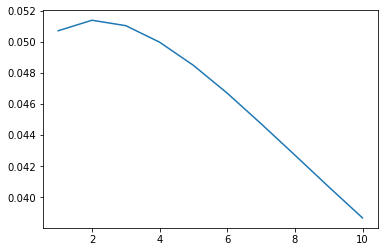

In [15]:
#e)

#Creating a variable to store the array of discount factors calculated with the matrix_operation method from the YieldCurve class
discount_factors=YieldCurve(maturity,price,coupon)
d_factors = (discount_factors.matrix_operation())


#From the obtained discount factors,loop through each one of them and calculate the corresponding spot rate
spot_rates=[]
for n in range(1,len(d_factors)+1):
    r0 = ((1/d_factors[n-1])**(1/n))-1
    
    #store the results obtained in each loop
    spot_rates.append(r0)

#Creating a DataFrame for the obtained spot rates
spot_rates = pd.DataFrame(spot_rates)
spot_rates.columns=['Spot Rates']
spot_rates['Maturity'] = range(1,11)

#Visualizing the DataFrame
print(spot_rates)

#Plotting the obtained spot rates,for each maturity
plt.plot(spot_rates['Maturity'],spot_rates['Spot Rates'])

[0.05072463768115943, 0.0513947974577041, 0.05105360885668887, 0.05002601840806586, 0.048606822953342795, 0.04693075263753644, 0.0451274540652176, 0.043310562386741226, 0.041513813840999184, 0.039790824253531844]


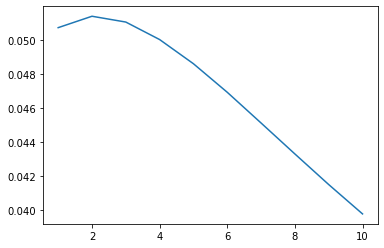

In [16]:
#f)

coupon = np.linspace(1.50,3.75,10)
price = [96.6, 93.71, 91.56, 90.24, 89.74, 90.04, 91.09, 92.82, 95.19, 98.14]
maturity = range(1,len(price)+1)

#Creating an array with the characteristics of each bond (maturity, price and coupon)
bonds = np.array([maturity,price,coupon]).T


#Defining a function that, given the price and the cashflow of a bond, calculates the implicit yield to maturity
def bond_ytm(maturity, price, coupon):
    ytm_func = lambda y : sum([(coupon if n < maturity else coupon + 1)/(1+y)**n
                               for n in range(1, maturity +1)]) * 100 - price
    return optimize.newton(ytm_func, 0)

#Looping through the information on the bonds array and calculating the implicit yield to maturity of each
yields = []
for bond in bonds:
    maturity, price, coupon = bond
    
    #storing the result of each loop 
    yields.append(bond_ytm(int(maturity), price, coupon/100))

#Visualizing the obtained yields  
print(yields)

#Plotting the obtained yields
plt.plot(range(1,11),yields)

       zero       fwd
0  0.050725       NaN
1  0.051401  0.051401
2  0.051051  0.050702
3  0.049987  0.047859
4  0.048496  0.044022
5  0.046704  0.039535
6  0.044738  0.034911
7  0.042717  0.030590
8  0.040675  0.026382
9  0.038674  0.022668


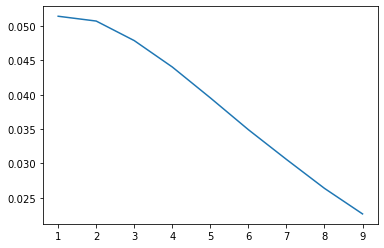

In [17]:
#g)

#Creating a DataFrame with the Spot Rates
rates = pd.DataFrame({
        'zero': spot_rates['Spot Rates']
    }, index= list(range(0,10)))

#Defining a function that calculates the forward rate using the spot rates (assuming no-arbitrage condition)
def makeFwd(df):
    df['N'] = df.index
    b = df.zero * df.N
    df['fwd'] = (b - b.shift()) / (df.N - df.N.shift())
    return df[['zero', 'fwd']]


#Store the obtained forward rates on the DataFrame
rates = makeFwd(rates)

#Visualizing the obtained forward rates 
print(rates)

#Plotting the obtained forward
plt.plot(rates.index, rates['fwd'])

       zero       fwd       ytm
0  0.050725       NaN  0.050725
1  0.051401  0.051401  0.051395
2  0.051051  0.050702  0.051054
3  0.049987  0.047859  0.050026
4  0.048496  0.044022  0.048607
5  0.046704  0.039535  0.046931
6  0.044738  0.034911  0.045127
7  0.042717  0.030590  0.043311
8  0.040675  0.026382  0.041514
9  0.038674  0.022668  0.039791


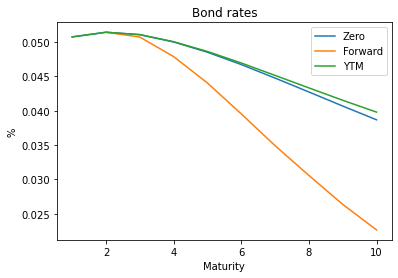

In [18]:
#h)

#creating a new column on the rates DataFrame to include the Yield to Maturities obtained
rates['ytm']=yields

#Visualizing the complete DataFrame
print(rates)


#Plot the three rates obtained
plt.plot(range(1,11),rates[['zero','fwd','ytm']])
plt.title('Bond rates')
plt.xlabel('Maturity')
plt.ylabel('%')
plt.legend(['Zero','Forward','YTM'])

In [15]:
#Exercise 2

In [20]:
#a)

#setting start and end dates
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2021,10,15)

#choosing 5 stocks
symbols =['AAPL','MSFT','NFLX','AMZN','TSLA']

#creating an empty DataFrame to store the information
stock_data = pd.DataFrame()

#Loop through each stock given and download information available on each, on yahoo finance
for i in symbols:
    stock = []
    stock = yf.download(i,start=start, end=end, progress=False)
        
    if len(stock) == 0:
        None
    else:
        stock['Name']=i
        stock_data = stock_data.append(stock,sort=False)

#Deleting non-essencial information
del stock_data['Open'] 
del stock_data['High']
del stock_data['Low']
del stock_data['Adj Close']

#Visualizing the DataFrame
stock_data

,Close,Volume,Name
Date,,,
2012-01-03,14.686786,302220800,AAPL
2012-01-04,14.765714,260022000,AAPL
2012-01-05,14.929643,271269600,AAPL
2012-01-06,15.085714,318292800,AAPL
2012-01-09,15.061786,394024400,AAPL
...,...,...,...
2021-10-08,785.489990,16711100,TSLA
2021-10-11,791.940002,14200300,TSLA
2021-10-12,805.719971,22020000,TSLA


Text(0, 0.5, '%')

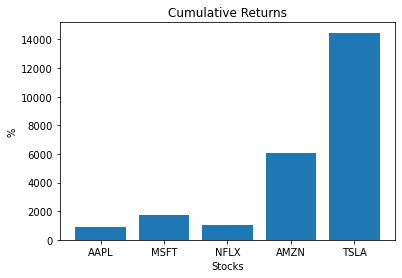

In [21]:
#b)
#Filtering data and setting Date as index
stock_data_prices = stock_data.pivot_table(index=['Date'], columns='Name', values=['Close'])
stock_data_prices.columns = [col[1] for col in stock_data_prices.columns.values]

#Calculating the cummulative returns
cum_return = ((stock_data_prices.iloc[-1]-stock_data_prices.iloc[0]) / stock_data_prices.iloc[0]) * 100

#plotting the cummulative returns for each stock
plt.bar(symbols,cum_return)
plt.title('Cumulative Returns')
plt.xlabel('Stocks')
plt.ylabel('%')

In [22]:
#c)

#Calculating daily returns
daily_returns = stock_data_prices.pct_change()

#Dropping the first line (Daily return N/A)
daily_returns = daily_returns[1:]

#Creating the correlation Matrix from the daily returns
corr_df = daily_returns.dropna().corr(method='pearson')
corr_df

,AAPL,AMZN,MSFT,NFLX,TSLA
AAPL,1.000000,0.441520,0.560642,0.260841,0.316462
AMZN,0.441520,1.000000,0.535481,0.414321,0.320874
MSFT,0.560642,0.535481,1.000000,0.344906,0.332121
NFLX,0.260841,0.414321,0.344906,1.000000,0.268085
TSLA,0.316462,0.320874,0.332121,0.268085,1.000000


In [23]:
#d)
#Saving the data onto 5 different csv files, one for each ticker
for idx, chunk in enumerate(np.array_split(stock_data, 5)):
    chunk.to_csv(f'/Users/guilhermemiranda/CF_{idx}.csv')

In [24]:
#e)

#Creating a variable with the path where the files are saved
path = r'/Users/guilhermemiranda/'
all_files = glob.glob(path + "CF_*.csv")

list = []

#Looping through all files and, for each, read it and append it to the empty DataFrame previously created
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    list.append(df)
stock_data_imp = pd.concat(list, axis=0, ignore_index=True)

#Deleting the volume variable from the DataFrame as we are only interested on the prices for each ticker
del stock_data_imp['Volume'] 

#Visualizing the DataFrame
stock_data_imp

,Date,Close,Name
0,2012-01-03,5.616000,TSLA
1,2012-01-04,5.542000,TSLA
2,2012-01-05,5.424000,TSLA
3,2012-01-06,5.382000,TSLA
4,2012-01-09,5.450000,TSLA
...,...,...,...
12310,2021-10-08,294.850006,MSFT
12311,2021-10-11,294.230011,MSFT
12312,2021-10-12,292.880005,MSFT
12313,2021-10-13,296.309998,MSFT
